<a href="https://colab.research.google.com/github/DrSubbiah/3.REM-META-ANALYSIS/blob/master/Classical%20REM%20Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center><font color="maroon"> Random Effects Model</center>

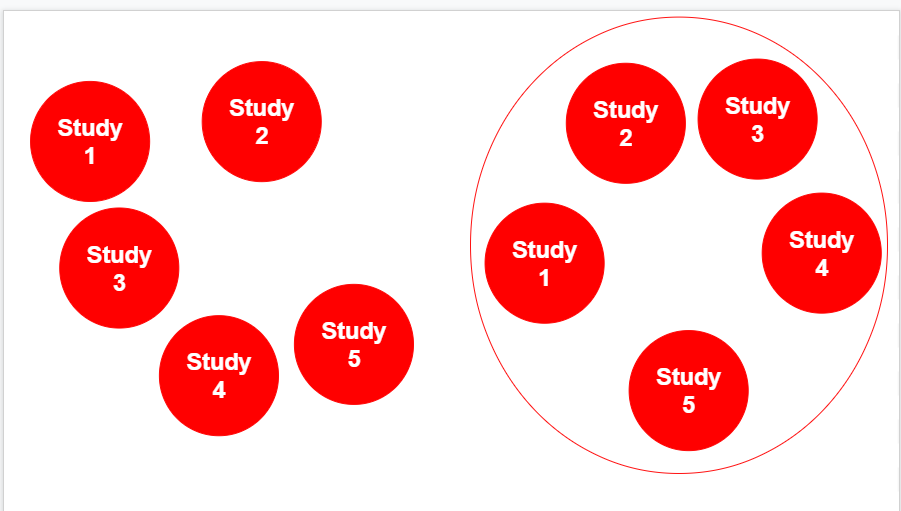


[Frame Work_Example](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6037848/)

# <font color="darkblue">Model Description

Let there be $k$ independent studies with an effect parameter (varible of interest) $\theta_i$ which is subjected to have a sampling error $\epsilon_i$.

Let $\textrm{Y}_i = \theta_i + \epsilon_i$ be an estimator for $\theta_i$ where $\epsilon_i  \sim \textrm{Normal}(0,\sigma_i^2)$

Equivalently $$\textrm{Y}_i  \overset{\textrm{iid}}\sim \textrm{Normal}(\theta_i,\sigma_i^2)$$

Further, $\theta_i$ is assumed from a population with an efect size $\theta$ and error $\eta_i$

As before, $\theta_i \sim \theta + \eta_i$ where $\eta_i \sim \textrm{Normal}(0,\tau^2)$

$$\therefore\theta_i \sim \textrm{Normal}(\theta,\tau^2)$$

1. $\sigma_i^2$ amounts sampling variability in the estimates of $i^{th}$ effect size

1. $\tau^2$ estimates the **variability between** the effect size


## Model Assumption

In most of the cases of $\textrm{Y}_i$, $\sigma^2_i$ are assumed to be known (estimated from data)

Two approaches

1. Approximation (Normal) method

1. Exact (Data) method

# <font color="darkblue"> Bayesian Hierarchical Model

[Image credit](https://florianwilhelm.info/2020/10/bayesian_hierarchical_modelling_at_scale/)


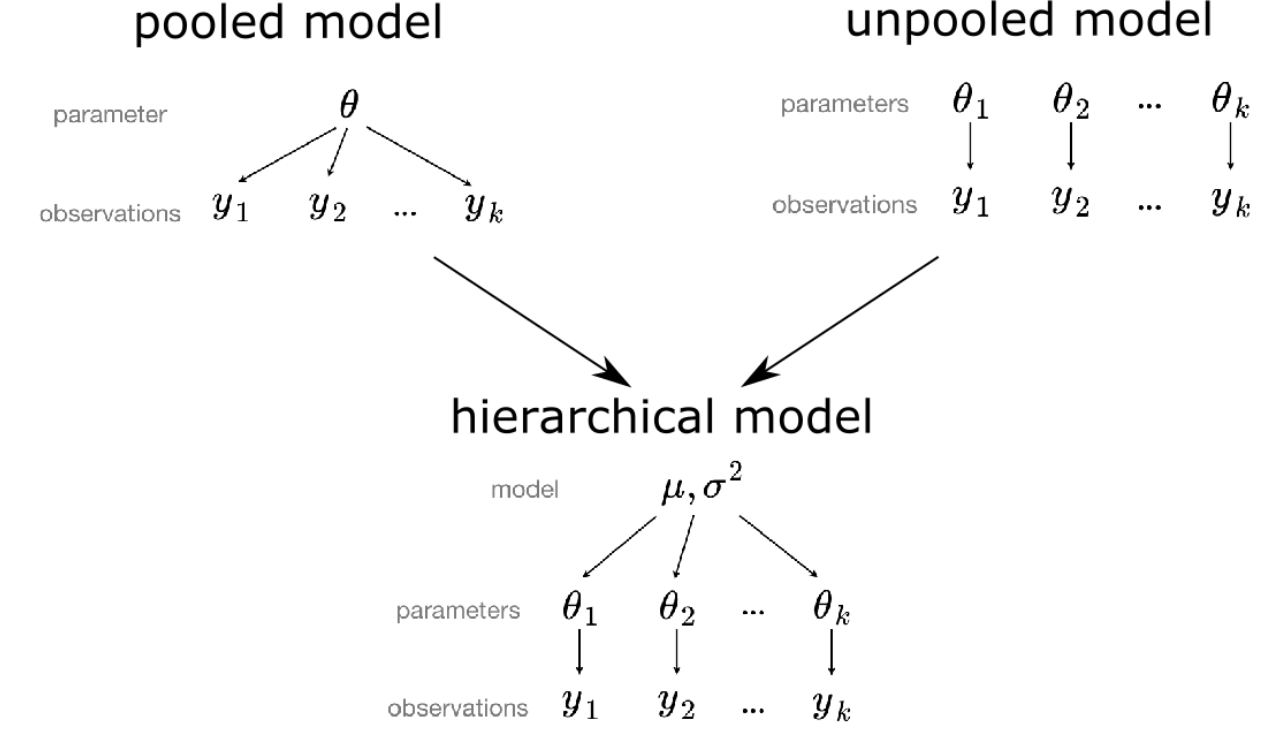

# <font color="darkblue"> $2\times2$ Tables

A categorical variable has a measurement scale consisting of two or more categories, and there is no intrinsic ordering to the categories.

The joint distribution between two categorical variables determines their relationship. This distribution also determines the marginal and conditional distributions.

Let $X$ and $Y$ denote two categorical response variables, $X$ with $I$ categories and $X$  with $J$ categories leading to $I\times J$ possible combinations.

A **contingency or cross-classification table** is a rectangular representation of $X$ and $Y$   with the cells contain frequency counts of outcomes for a sample.

This notes is restricted to contingency table with 2 rows and 2 columns as shown below,  usually referred as a $2\times2$  table

# <font color = "darkblue">Measures of Association

In a typical $2\times2$ contingency table, **independent binomial** for the two row variables $X$ and $Y$ is one of the predominant models.

The question of interest is expressed in terms of the **two proportions** $p$ and $q$, parameter of the binomial distributions.

The inference concerning these three measures,have received considerable attention

1. Risk Difference (RD) : $\delta = p - q$

1. Relative Risk (RR) : $\rho = \frac{p}{q}$

1. Odds Ratio (OR): $\psi = \frac{p/(1-p)}{q/(1-q)}=\frac{p(1-q)}{q(1-p)}$


The analysis include

1. comparison of two binomial populations as a single $2\times2$ table

1. common summary measure for binary response when there are multiple $2\times2$ tables in the study as in the case of multicenter trials.

These measures are also useful in testing the association between the variables, whether independent $(\delta=0, \textrm{or} ~\rho =1,\textrm{or} ~ \psi=1)$ or not.

### <font color = "darkblue">Further, when multiple $2\times2$ tables are combined additional measures include, combined study-effect and between-variance or measure of heterogeneity

# <font color="darkblue"> Example Data Set

Carlin

In [ ]:
import numpy as np
import pandas as pd
import statistics as stat
import scipy
import pystan

In [ ]:
!jupyter notebook stop
!jupyter notebook

|INFO|interrupted
|CRITICAL|received signal 2, stopping
|CRITICAL|Shutting down...
|INFO|Shutting down 0 kernels
|INFO|Shutting down 0 terminals


In [ ]:
#For plots
import arviz as az
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Data Sets/Carlin.csv"
carlin_da = pd.read_csv(path)

In [ ]:
carlin_da.head()

,Title,ai,bi,ci,di
0,Study 1,3,35,3,36
1,Study 2,7,107,14,102
2,Study 3,5,64,11,82
3,Study 4,102,1431,127,1393
4,Study 5,28,327,27,338


#<font color="barkblue"> Normal Approximation method a.k.a Summary Statistics (SS) Model

Let $\textrm{Y}_i$ be any one of these three summary measures and $\sigma_i^2$ be obtained from the respective formulas. Then the underlying model is using two level normal distributions

$$\textrm{Y}_i \sim \textrm{Normal} (\theta_i,\sigma_i^2)$$ where $i=1,2,\cdots\cdots k$; $k$ is the number of $2\times2$ tables / studies
$$\theta_i \sim \textrm{Normal} (\theta,\tau^2)$$


Suitable prior distributions may be chosen for the second level parameters mean $\theta$ and variance $\tau^2$.

For example, a Normal and a Gamma distribution can be used as prior distributions ffor these two parameters respectively. Parameters involved in the third level distributions may be appropriately chosen to complete this hierarchichal structure.


Hence, the complete model (as an example) is $$\textrm{Y}_i \sim \textrm{Normal}(\theta_i, \sigma_i^2)$$
   $$\mu \sim \textrm{Normal}(\theta, \tau^2)$$
   $$\theta \sim \textrm{Normal}(m_\theta,v_\theta)$$
   $$\tau^2 \sim \textrm{Inverse Gamma}(\tau_1, \tau_2)$$

Appropriate constants can be chosen for the four constants $-\infty < m_\theta < \infty,v_\theta>0, \tau_1 >0, \textrm{and} ~ \tau_2>0$

#<font color="barkblue"> Summary Statistics (SS) Model - Odds Ratio

Let $Y_i$ be log odds ratio calculated from a single table. where $i=1,2,\cdots\cdots k$ and $k$ is the number of $2\times2$ tables

For $i^{th}$ table, log odds ratio is $$Y_i=\frac{a_id_i}{b_ic_i}$$


Then $\sigma_i^2$ is sampling variance calculated from the data

$$\sigma_i^2 = \frac{1}{a_i}+\frac{1}{b_i}+\frac{1}{c_i}+\frac{1}{d_i}$$

#<font color="barkred"> Bayesian Model

Underlying model is using two level normal distributions

$$Y_i \sim \textrm{Normal} (\theta_i,\sigma_i^2)$$


$$\theta_i \sim \textrm{Normal} (\theta,\tau^2)$$


Suitable prior distributions may be chosen for the second level parameters mean $\theta$ and variance $\tau^2$.

For example, a Normal and a Gamma distribution can be used as prior distributions for these two parameters respectively.


Hence, the complete model (as an example) is

 $$\textrm{Y}_i \sim \textrm{Normal}(\theta_i, \sigma_i^2)$$

   $$\mu \sim \textrm{Normal}(\theta, \tau^2)$$

   $$\theta \sim \textrm{Normal}(m_\theta,v_\theta)$$

   $$\tau^2 \sim \textrm{Inverse Gamma}(\tau_1, \tau_2)$$

Appropriate constants can be chosen for the four constants $-\infty < m_\theta < \infty,v_\theta>0, \tau_1 >0, \textrm{and} ~ \tau_2>0$


<font color="darkgreen">Once this model is set-up, we can carry out MCMC sampling and obtain necessary estimates regarding the desired parameters; overall RD and measure of heterogeneity

# <font color="darkorange"> Handling Zero counts

If any count is zero then we will add a small positive number to that cell. This is usually referred as **continuity correct (cc)**

Usually cc = 0.5

In [ ]:
def my_fun (var1,var2,cc):
    carlin_da[var2]= np.where(carlin_da[var1]==0,carlin_da[var1]+cc,carlin_da[var1])
    return carlin_da

carlin_da = my_fun('ai','a',0.5)
carlin_da = my_fun('bi','b',0.5)
carlin_da = my_fun('ci','c',0.5)
carlin_da = my_fun('di','d',0.5)
print (carlin_da)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


       Title   ai    bi   ci    di      a       b      c       d
0    Study 1    3    35    3    36    3.0    35.0    3.0    36.0
1    Study 2    7   107   14   102    7.0   107.0   14.0   102.0
2    Study 3    5    64   11    82    5.0    64.0   11.0    82.0
3    Study 4  102  1431  127  1393  102.0  1431.0  127.0  1393.0
4    Study 5   28   327   27   338   28.0   327.0   27.0   338.0
5    Study 6    4    55    6    46    4.0    55.0    6.0    46.0
6    Study 7   98   847  152   787   98.0   847.0  152.0   787.0
7    Study 8   60   572   48   423   60.0   572.0   48.0   423.0
8    Study 9   25   253   37   245   25.0   253.0   37.0   245.0
9   Study 10  138  1778  188  1733  138.0  1778.0  188.0  1733.0
10  Study 11   64   809   52   531   64.0   809.0   52.0   531.0
11  Study 12   45   218   47   219   45.0   218.0   47.0   219.0
12  Study 13    9   282   16   277    9.0   282.0   16.0   277.0
13  Study 14   57   801   45   838   57.0   801.0   45.0   838.0
14  Study 15   25   129  

In [ ]:
a=carlin_da['a'].values
b=carlin_da['b'].values
c=carlin_da['c'].values
d=carlin_da['d'].values

s_odr=((a*d)/(b*c))
s_lodr=np.log(((a*d)/(b*c)))
s_var=(1/a)+(1/b)+(1/c)+(1/d)
s_sd=np.sqrt(s_var)

In [ ]:
rem_SS_OR_data= {
             'k': len(s_lodr),
             'y': s_lodr,
             'stdv':s_sd,
             'sig1':3,
             'sig2':1,
             'm_d':0,
             's_d':100
            }
print(rem_SS_OR_data)

{'k': 22, 'y': array([ 0.02817088, -0.7410032 , -0.5406212 , -0.24612808,  0.06945337,
       -0.5841569 , -0.51238549, -0.07862326, -0.42417337, -0.3348234 ,
       -0.21339753, -0.03890844, -0.59325371,  0.28154593, -0.32133359,
       -0.13534792,  0.14060645,  0.32204972,  0.44438052, -0.21750973,
       -0.59107599, -0.60809913]), 'stdv': array([0.8503034 , 0.48315156, 0.56456108, 0.1381833 , 0.28065639,
       0.67571267, 0.13868783, 0.20399098, 0.27397304, 0.11706831,
       0.19487202, 0.22946064, 0.4251674 , 0.20544546, 0.29770907,
       0.26092189, 0.36417418, 0.55264494, 0.71664913, 0.25984167,
       0.25720686, 0.27237865]), 'sig1': 3, 'sig2': 1, 'm_d': 0, 's_d': 100}


In [ ]:
rem_SS_OR_code = """
data {
  int<lower=0> k;
  real y[k];
  real<lower=0> stdv[k];

  real m_d;
  real<lower=0> s_d;
  real<lower=0> sig1;
  real<lower=0> sig2;
}
parameters {
  real delta;
  real<lower=0> tausq;
  vector[k] mu;
}
transformed parameters {
  real<lower=0> tau;
  tau = sqrt(tausq);
}
model {
  y ~ normal(mu, stdv);
  mu ~ normal(delta, tau);
  delta ~ normal(m_d,s_d);
  tausq ~ inv_gamma(sig1, sig2);
}

"""
rem_SS_OR_mod=pystan.StanModel(model_code=rem_SS_OR_code)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_dd7388fed942ce8cfd5c87002d5abd42 NOW.


In [ ]:
rem_SS_OR_fit= rem_SS_OR_mod.sampling(data=rem_SS_OR_data,
                  iter=10000,
                  chains=4,
                  seed=1,
                  warmup=3000,
                  thin=1,
                  control={"max_treedepth":15,"adapt_delta" : 0.9999})

In [ ]:
az.plot_trace(rem_SS_OR_fit,compact=False, legend=True)
plt.show()

In [ ]:
rem_SS_OR_summ=az.summary(rem_SS_OR_fit,var_names=["delta","tausq"],round_to=3,hdi_prob=0.95)
rem_SS_OR_summ

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
delta,-0.238,0.108,-0.453,-0.029,0.001,0.0,29276.412,24069.986,1.0
tausq,0.157,0.055,0.070,0.265,0.000,0.0,23957.872,21118.148,1.0


In [ ]:
data_SS = az.from_pystan(posterior=rem_SS_OR_fit)

data_SS.posterior['OverallOR']=np.exp(data_SS.posterior.delta)
data_SS.posterior['IndiOR']=np.exp(data_SS.posterior.mu)

In [ ]:
res_SS=az.summary(data_SS,var_names=["OverallOR","tausq","IndiOR"])
res_SS.drop('sd', axis=1)

,mean,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
OverallOR,0.793,0.640,0.961,0.001,0.000,29276.0,24070.0,1.0
tausq,0.157,0.070,0.256,0.000,0.000,23958.0,21118.0,1.0
IndiOR[0],0.881,0.352,1.504,0.002,0.001,42502.0,20875.0,1.0
IndiOR[1],0.678,0.332,1.086,0.001,0.001,46167.0,20914.0,1.0
IndiOR[2],0.752,0.326,1.222,0.001,0.001,46403.0,18713.0,1.0
IndiOR[3],0.790,0.602,0.982,0.000,0.000,51158.0,20119.0,1.0
IndiOR[4],0.990,0.585,1.434,0.001,0.001,46374.0,19567.0,1.0
IndiOR[5],0.766,0.318,1.262,0.001,0.001,45181.0,22160.0,1.0
IndiOR[6],0.624,0.479,0.782,0.000,0.000,49291.0,19660.0,1.0
IndiOR[7],0.906,0.609,1.213,0.001,0.001,51520.0,20591.0,1.0


INFO:numba.core.transforms:finding looplift candidates


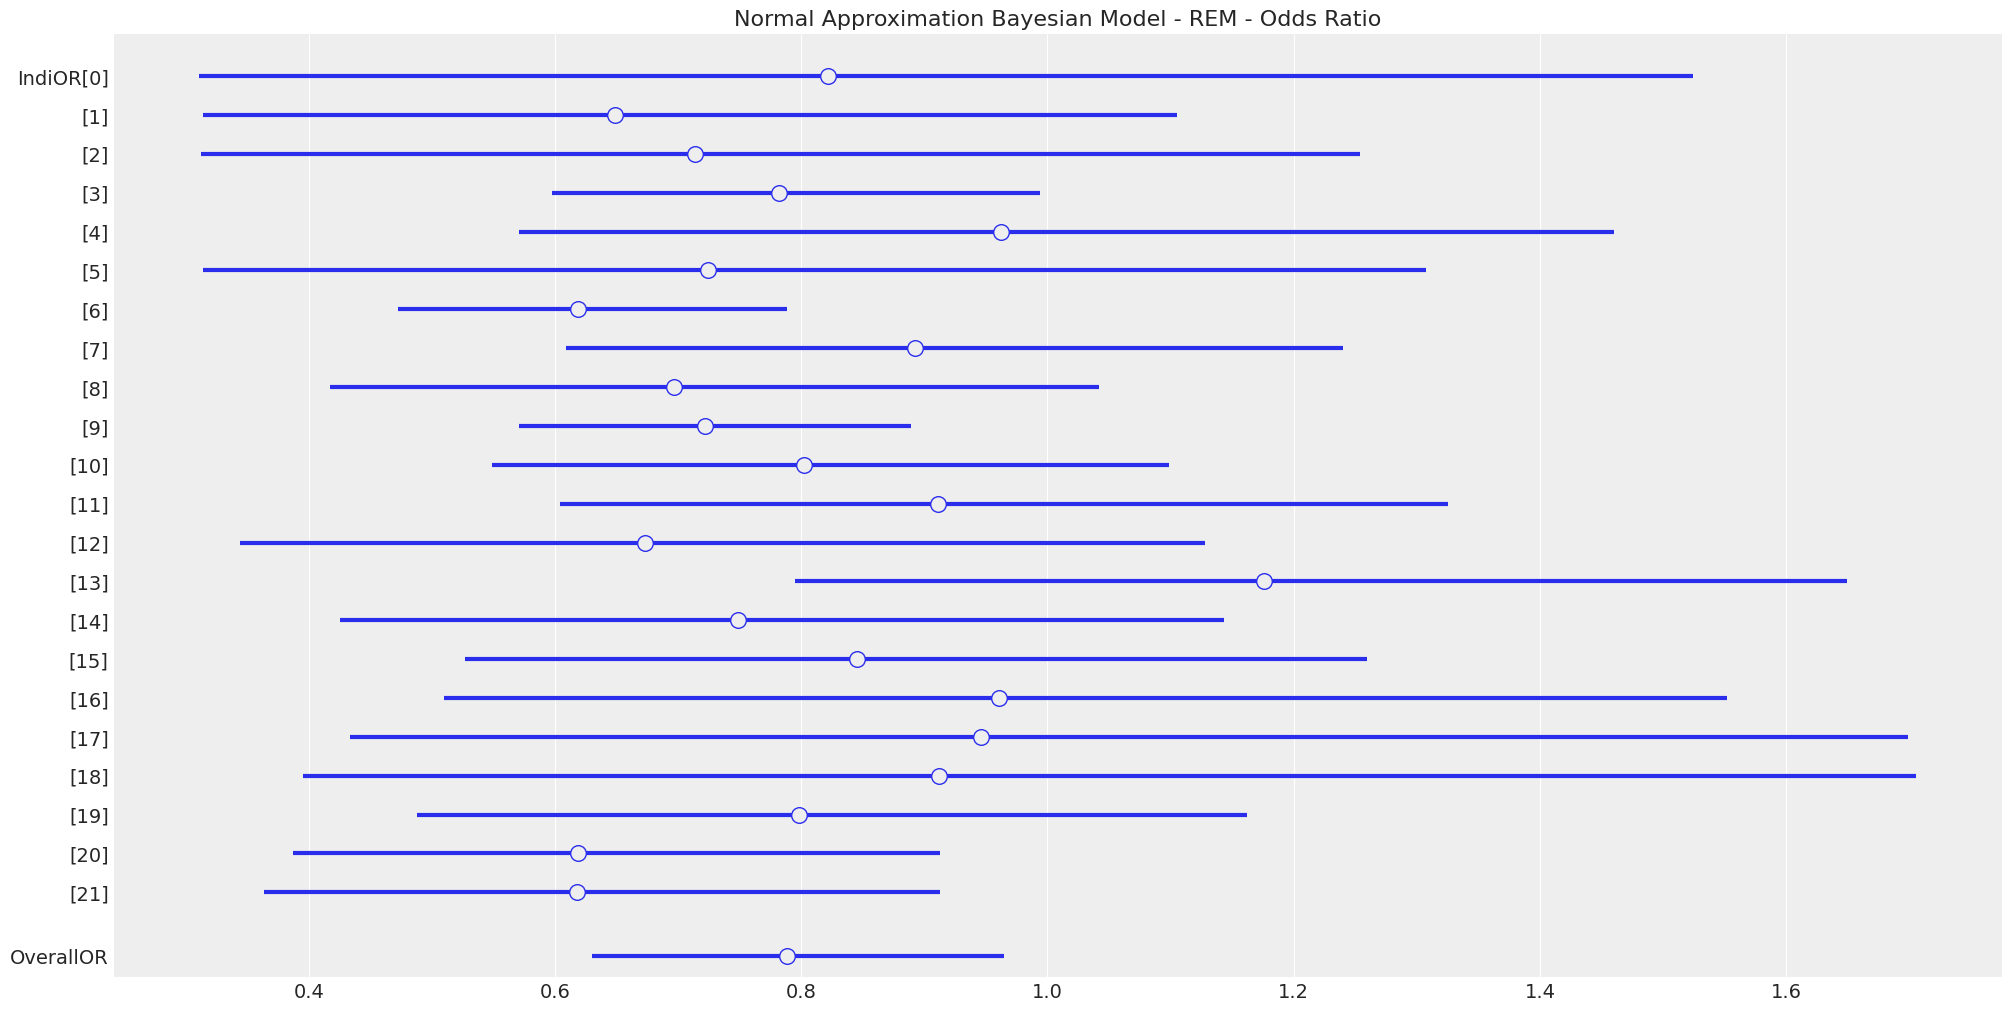

In [ ]:
import matplotlib.pyplot as pylt

az.style.use("arviz-darkgrid")

axes = az.plot_forest([data_SS], var_names=['IndiOR', 'OverallOR'],combined=True,
                      quartiles=False,hdi_prob=0.95,figsize=(20, 10),markersize=15)
axes[0].set_title("Normal Approximation Bayesian Model - REM - Odds Ratio")

plt.show()

# <font color="darkblue"> Fully Bayesian REM

This model differs from SS in the way it treats the data, that is likelihood part of Bayesian model.

In SS we have asymptotic normal distribution for the summary measure (estimator).

Whereas, FB utilises the exact data-likelhood rather than asymptotic normal distribution. However, second and further level distributions may be similar to that of SS.

Corresponding to each of the $k$ tables,the likelihood of FB model is

$$X_1 \sim \textrm{Binomial}(n_1,\theta_1)$$

$$X_2 \sim \textrm{Binomial}(n_2,\theta_2)$$

The subsripts  respectively denote teh two arms of a $2\times2$ table. The above representation is applicable for all $k$ tables; nevertheless, for convenience we ignore index for a table. Also $X_1$ and $X_2$ are independent.

Now depending on the desired effect-size parameter (OR) we can construct the distributions in the subsequent levels of this (FB) hierarchical model.

Let us consider, for example the model for OR

$$\psi = \frac{\theta_1/(1-\theta_1)}{\theta_2/(1-\theta_1)}$$

## <font color="darkviolet"> Bayesian HBM

$$X_1 \sim \textrm{Binomial}(n_1,\theta_1)$$


$$X_2 \sim \textrm{Binomial}(n_2,\theta_2)$$

We define

$$\delta=\log(\psi)=\log\big[\frac{\theta_1/(1-\theta_1)}{\theta_2/(1-\theta_1)}\big]$$

Consider the average effect of a table as

$$\mu=\frac{logit(\theta_1)+logit(\theta_2)}{2}$$

Then, the second stage of the model is specifying priors for $\mu$ and $\delta$

For example, Let

$$\delta \sim \textrm{Normal} (d,\tau^2)$$

$$\mu \sim \textrm{Normal}(\mu_0, \sigma_0^2)$$

Appropriate constants can be chosen for the constants $-\infty < \mu_0, d < \infty$ and $\sigma_0^2 , \tau_2>0$

In [ ]:
n1=carlin_da.ai+carlin_da.bi
n2=carlin_da.ci+carlin_da.di

In [ ]:
rem_FB_OR_data= {
             'r1': carlin_da.ai,
             'n1': n1,
             'r2': carlin_da.ci,
             'n2': n2,
             'k':len(a),
             'mu0':0,
             'si0':100,
             'tau1':3,
             'tau2':1,
             'm_d':0,
             's_d':1E2
            }
print(rem_FB_OR_data)

In [ ]:
rem_FB_OR_code = """
data{
int<lower=0> k;
  int<lower=0> n1[k];
  int<lower=0> r1[k];
  int<lower=0> n2[k];
  int<lower=0> r2[k];
  real mu0;
  real<lower=0> si0;
  real m_d;
  real<lower=0> s_d;
  real<lower=0> tau1;
  real<lower=0> tau2;
}
parameters {
  real d;
  real<lower=0> tausq;
  vector[k] mu;
  vector[k] delta;
}
transformed parameters {
  real<lower=0> tau;
  vector<lower=0,upper=1>[k] p2;
  vector<lower=0,upper=1>[k] p1;
  p2=inv_logit(mu-delta/2);
  p1=inv_logit(mu+delta/2);
  tau = sqrt(tausq);
}
model {
  r1 ~ binomial(n1, p1);
  r2 ~ binomial(n2, p2);
  mu ~ normal(mu0, si0);
  delta ~ normal(d, tau);
  d~normal(m_d,s_d);
  tausq ~ inv_gamma(tau1, tau2);
}

"""
rem_FB_OR_mod=pystan.StanModel(model_code=rem_FB_OR_code)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_adaa3cf8f08491a64ce4cbd52fb1cef0 NOW.


In [ ]:
rem_FB_OR_fit= rem_FB_OR_mod.sampling(data=rem_FB_OR_data,
                  iter=10000,
                  chains=4,
                  seed=1,
                  warmup=3000,
                  thin=1,
                  control={"max_treedepth":15,"adapt_delta" : 0.9999})

In [ ]:
rem_FB_OR_summ=az.summary(rem_FB_OR_fit,var_names=["d","tausq"],round_to=3,hdi_prob=0.95)
rem_FB_OR_summ

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
d,-0.238,0.108,-0.445,-0.022,0.001,0.001,19971.284,20953.821,1.0
tausq,0.158,0.056,0.071,0.269,0.000,0.000,22056.390,19590.379,1.0


In [ ]:
data_FB = az.from_pystan(posterior=rem_FB_OR_fit)

data_FB.posterior['OverallOR']=np.exp(data_FB.posterior.d)
data_FB.posterior['IndiOR']=np.exp(data_FB.posterior.delta)

In [ ]:
res_FB=az.summary(data_FB,var_names=["OverallOR","tausq","IndiOR"],hdi_prob=0.95)
res_FB.drop('sd', axis=1)

In [ ]:
import matplotlib.pyplot as pylt

az.style.use("arviz-darkgrid")

axes = az.plot_forest([data_FB], var_names=['IndiOR', 'OverallOR'],combined=True,
                      quartiles=False,hdi_prob=0.95,figsize=(20, 10),markersize=15)
axes[0].set_title("Fully Bayesian Model - REM - Odds Ratio")

plt.show()

# <font color="darkblue">Binomial Proportion

If there are $k$ independent Binomial events with common success event, then it is possible to apply HBM for understanding overall effect size the amount of **between-variablilty**


Both SS and FB can be attempted with the transformed parameter, logit of the proportion

For SS, approximate within-variability has to be evaluated from the data


## <font color="darkviolet"> Model

$$X_i \sim \textrm{Binomial}(n_i, p_i)$$

$$y_i = \textrm{logit}(p_i)$$

In SS approach, $Y$ and its approximate SD are caluclated from the data

In FB, $X$ is modelled directly with the exact (binomial) likelihood



# <font color="darkblue"> Data from [cricinfo](https://stats.espncricinfo.com/ci/engine/stats/index.html)

**Aim:** Player's performance in scoring a ton

**Game Format:** Test matches

**Period:** 2015 - 2020

**Player:** Kohli V

**Data format:**

1. $n=$ Number of innings played

1. $x=$ Number of tons scored

1. Groups: Seven countries $(k=7)$

    - AUS, BAN, ENG, Nz, SA, SL, WI

**QoI:** Whether the player is consistent in scoring a century while playing with different nations

**Profiling Interest** Method can be useful to compare players of similar abilities and skills

# <font color="darkorange">Collected Data

In [ ]:
x=[7,2,5,3,3,5,2]
n=[20,4,27,11,13,9,14]


# <font color="darkviolet">SS_REM - Proportions

In [ ]:
p=np.divide(x,n)

s_logitp=np.log(np.divide(p,(1-p)))
t1=np.divide(1,x)+np.divide(1,np.subtract(n,x))

s_sd=np.sqrt(t1)

In [ ]:
rem_SS_PR_data= {
             'k': len(x),
             'y': s_logitp,
             'stdv':s_sd,
             'sig1':3,
             'sig2':1,
             'm_d':0,
             's_d':100
            }
print(rem_SS_PR_data)

{'k': 7, 'y': array([-0.61903921,  0.        , -1.48160454, -0.98082925, -1.2039728 ,
        0.22314355, -1.79175947]), 'stdv': array([0.46880723, 1.        , 0.49543369, 0.6770032 , 0.65828059,
       0.67082039, 0.76376262]), 'sig1': 3, 'sig2': 1, 'm_d': 0, 's_d': 100}


In [ ]:
rem_SS_PR_code = """
data {
  int<lower=0> k;
  real y[k];
  real<lower=0> stdv[k];

  real m_d;
  real<lower=0> s_d;
  real<lower=0> sig1;
  real<lower=0> sig2;
}
parameters {
  real delta;
  real<lower=0> tausq;
  vector[k] mu;
}
transformed parameters {
  real<lower=0> tau;
  tau = sqrt(tausq);
}
model {
  y ~ normal(mu, stdv);
  mu ~ normal(delta, tau);
  delta ~ normal(m_d,s_d);
  tausq ~ inv_gamma(sig1, sig2);
}

"""
rem_SS_PR_mod=pystan.StanModel(model_code=rem_SS_PR_code)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_dd7388fed942ce8cfd5c87002d5abd42 NOW.


In [ ]:
rem_SS_PR_fit= rem_SS_PR_mod.sampling(data=rem_SS_PR_data,
                  iter=10000,
                  chains=4,
                  seed=1,
                  warmup=3000,
                  thin=1,
                  control={"max_treedepth":15,"adapt_delta" : 0.9999})

In [ ]:
rem_SS_PR_summ=az.summary(rem_SS_PR_fit,var_names=["delta","tausq"],round_to=3,hdi_prob=0.95)
rem_SS_PR_summ

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
delta,-0.885,0.335,-1.553,-0.233,0.003,0.002,13885.304,18114.214,1.0
tausq,0.368,0.229,0.093,0.787,0.002,0.001,14905.240,17549.063,1.0


In [ ]:
data_SS = az.from_pystan(posterior=rem_SS_PR_fit)

data_SS.posterior['OverallPR']=scipy.special.expit(data_SS.posterior.delta)
data_SS.posterior['IndiPR']=scipy.special.expit(data_SS.posterior.mu)

In [ ]:
res_SS=az.summary(data_SS,var_names=["OverallPR","tausq","IndiPR"])
res_SS.drop('sd', axis=1)

,mean,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
OverallPR,0.297,0.173,0.428,0.001,0.000,13885.0,18114.0,1.0
tausq,0.368,0.098,0.746,0.002,0.001,14905.0,17549.0,1.0
IndiPR[0],0.331,0.181,0.487,0.001,0.000,21513.0,20091.0,1.0
IndiPR[1],0.350,0.139,0.580,0.001,0.001,19312.0,19644.0,1.0
IndiPR[2],0.235,0.114,0.372,0.000,0.000,21391.0,20444.0,1.0
IndiPR[3],0.292,0.124,0.470,0.001,0.000,21594.0,19718.0,1.0
IndiPR[4],0.274,0.115,0.442,0.001,0.000,21439.0,20195.0,1.0
IndiPR[5],0.401,0.196,0.613,0.001,0.001,19872.0,18507.0,1.0
IndiPR[6],0.241,0.083,0.408,0.001,0.000,19964.0,18734.0,1.0


INFO:numba.core.transforms:finding looplift candidates


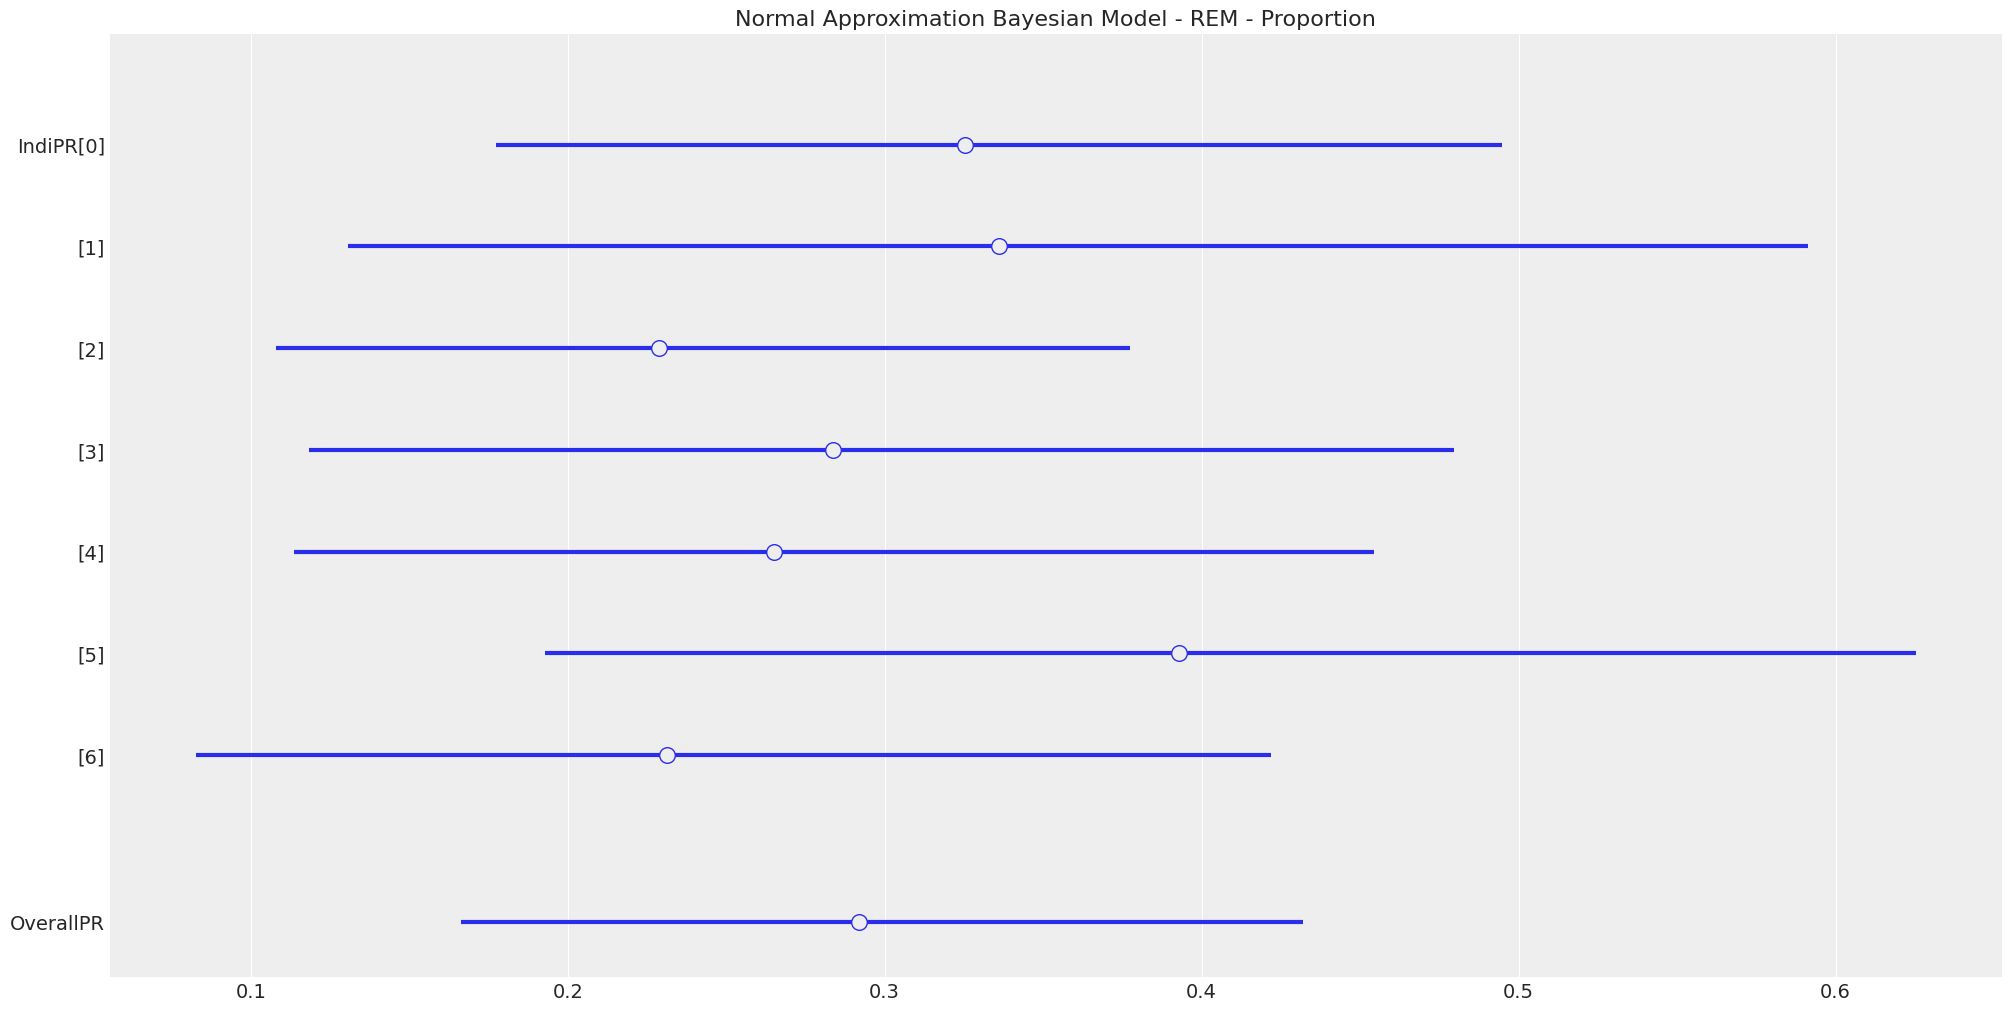

In [ ]:
import matplotlib.pyplot as pylt
az.style.use("arviz-darkgrid")
axes = az.plot_forest([data_SS], var_names=['IndiPR', 'OverallPR'],combined=True,
                      quartiles=False,hdi_prob=0.95,figsize=(20, 10),markersize=15)
axes[0].set_title("Normal Approximation Bayesian Model - REM - Proportion")

plt.show()

# <font color="darkviolet">FB_REM - Proportions

In [ ]:
rem_FB_PR_code = """
data{
int<lower=0> k;
  int<lower=1> n[k];
  int<lower=0> y[k];
  real m_d;
  real<lower=0> s_d;
  real<lower=0> tau1;
  real<lower=0> tau2;
}
parameters {
  real d;
  real<lower=0> tausq;
  vector[k] delta;
}
transformed parameters {
  real<lower=0> tau;
  vector<lower=0,upper=1>[k] p;
  p=inv_logit(delta);
  tau = sqrt(tausq);
}
model {
  y ~ binomial(n, p);
  delta ~ normal(d, tau);
  d~normal(m_d,s_d);
  tausq ~ inv_gamma(tau1, tau2);
}

"""
rem_FB_PR_mod=pystan.StanModel(model_code=rem_FB_PR_code)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e5747ea73f90699b4368f41faefabeb3 NOW.


In [ ]:
rem_FB_PR_data= {
             'k': len(x),
             'y': x,
             'n':n,
             'tau1':3,
             'tau2':1,
             'm_d':0,
             's_d':100
            }
print(rem_FB_PR_data)

{'k': 7, 'y': [7, 2, 5, 3, 3, 5, 2], 'n': [20, 4, 27, 11, 13, 9, 14], 'tau1': 3, 'tau2': 1, 'm_d': 0, 's_d': 100}


In [ ]:
rem_FB_PR_fit= rem_FB_PR_mod.sampling(data=rem_FB_PR_data,
                  iter=10000,
                  chains=4,
                  seed=1,
                  warmup=3000,
                  thin=1,
                  control={"max_treedepth":15,"adapt_delta" : 0.9999})

In [ ]:
rem_FB_PR_summ=az.summary(rem_FB_PR_fit,var_names=["delta","tausq"],round_to=3,hdi_prob=0.95)
rem_FB_PR_summ

In [ ]:
data_FB = az.from_pystan(posterior=rem_FB_PR_fit)

data_FB.posterior['OverallPR']=scipy.special.expit(data_FB.posterior.d)
data_FB.posterior['IndiPR']=scipy.special.expit(data_FB.posterior.delta)

In [ ]:
res_FB=az.summary(data_FB,var_names=["OverallPR","tausq","IndiPR"])
res_FB.drop('sd', axis=1)

In [ ]:
import matplotlib.pyplot as pylt
az.style.use("arviz-darkgrid")
axes = az.plot_forest([data_FB], var_names=['IndiPR', 'OverallPR'],combined=True,
                      quartiles=False,hdi_prob=0.95,figsize=(20, 10),markersize=15)
axes[0].set_title("Fully Bayesian Model - REM - Proportion")

plt.show()

# <font color="darkblue">SS_REM - Means

Suppose mean of a numeric variable is computed based on levels of a grouping variable, then REM may be useful to find the between variability of group means from the overall mean

For example, let us consider **Wage data set** from [here](https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Data/Wage.csv) which has twelve variables of which nine variables are categorical.

*wage* is a numeric variable and let us try to estimate the variability of means between seven years

## <font color="darkviolet"> SS Model

If $Y_i$ is the sample mean of $i^{th}$ group $(X_{1i},X_{2i},\cdots$) then we can estimate its SE using $S/\sqrt{n}$ where $S$ is the sample variance

Hence, the nput data is two vectors

1. Vector of means $Y_i=\bar{X_i}$

1. Vector of SE $\sigma_i$

Hence, the model is

$$Y \sim \textrm{Normal}(\mu,\sigma_i^2)$$

$$\mu \sim (\textrm{Normal}(d,\tau^2)$$


$$d \sim \textrm{Normal}(m_d,s_d)$$


$$\tau^2 \sim \textrm{inv_gamma}(\tau_1, \tau_2)$$

Suitable values can be considered for the hyperparameters


In [ ]:
rem_SS_ME_code = """
data{
int<lower=0> k;
  real y[k];
  real m_d;
  real<lower=0> s_d;
  real<lower=0> tau1;
  real<lower=0> tau2;
  real<lower=0> sig[k];
}
parameters {
  real mu[k];
  real d;
  real<lower=0> tausq;
  }
transformed parameters {
  real<lower=0> tau;
  tau = sqrt(tausq);
  }
model {
  y ~ normal(mu, sig);
  mu ~ normal(d, tau);
  d~normal(m_d,s_d);
  tausq ~ inv_gamma(tau1, tau2);
  }

"""
rem_SS_ME_mod=pystan.StanModel(model_code=rem_SS_ME_code)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_bb90597b7890c6c945d88605bd27ed4a NOW.


## Data Preparation

In [ ]:
path = "/content/drive/MyDrive/Data Sets/Wage.csv"
wage_da = pd.read_csv(path)

In [ ]:
w_me=wage_da.groupby(['year'])['wage'].mean()
w_sd=wage_da.groupby(['year'])['wage'].std(ddof=1)
w_cnt=wage_da.groupby(['year'])['wage'].count()

In [ ]:
np.array(w_sd)/np.sqrt(np.array(w_cnt))

In [ ]:
# x=(106.198284,111.159997,110.037857,114.242579,112.894556,113.551999,115.971771)
# s_sd=(1.84006946, 1.89141391, 1.82205553, 2.18922659, 2.11806435,2.15687111, 2.15802459)
x=np.array(w_me)
s_sd=np.array(w_sd)/np.sqrt(np.array(w_cnt))

rem_SS_ME_data= {
             'k': len(x),
             'y': x,
             'sig':s_sd,
             'tau1':3,
             'tau2':1,
             'm_d':100,
             's_d':10
            }
print(rem_SS_ME_data)

In [ ]:
rem_SS_ME_fit= rem_FB_ME_mod.sampling(data=rem_SS_ME_data,
                  iter=10000,
                  chains=4,
                  seed=1,
                  warmup=3000,
                  thin=1,
                  control={"max_treedepth":15,"adapt_delta" : 0.9999})

In [ ]:
rem_SS_ME_summ=az.summary(rem_SS_ME_fit,var_names=["d","tausq"],round_to=3,hdi_prob=0.95)
rem_SS_ME_summ

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
d,111.569,0.810,109.971,113.142,0.012,0.009,4486.210,6984.353,1.001
tausq,0.696,0.824,0.091,1.966,0.012,0.009,4976.774,6456.943,1.001


In [ ]:
data_SS = az.from_pystan(posterior=rem_SS_ME_fit)

data_SS.posterior['OverallME']=data_SS.posterior.d
data_SS.posterior['IndiME']=data_SS.posterior.mu


In [ ]:
import matplotlib.pyplot as pylt
az.style.use("arviz-darkgrid")
axes = az.plot_forest([data_SS], var_names=['IndiME', 'OverallME'],combined=True,
                      quartiles=False,hdi_prob=0.95,figsize=(20, 10),markersize=15)
axes[0].set_title("Bayesian Model - Summary Statistics_REM - Normal Means")

plt.show()

# <font color="darkblue">SS_REM - SMD - [Cohen-d](https://en.wikipedia.org/wiki/Effect_size#Cohen.27s_d) $C_d$

The standardized mean difference (SMD) is defined as the difference in population means between two groups (often this difference represents the effect of some intervention), scaled by the population standard deviation of the outcome metric.


For example, let us consider **Wage data set** from [here](https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Data/Wage.csv) which has twelve variables of which nine variables are categorical.

*wage* is a numeric variable and let us try to estimate the variability of means between seven years between two groups of *jobclass*

## <font color="darkviolet"> SS Model

Sample SMD  $C_d= \frac{\bar{X_1}-\bar{X_2}}{\sigma_{pooled}}$ where $\sigma_{pooled}=\sqrt{\frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}}$

If $Y_i$ is the sample SMD of $i^{th}$ group $(X_{1i},X_{2i},\cdots$) then we can estimate its SE ($\sigma_i$) using

$$\frac{n_1+n_2}{n_1*n_2}+\frac{C_d^2}{2(n_1+n_2-2)}$$

Hence, the nput data is two vectors

1. Vector of means $Y_i=d_i$ of $i^{th}$ group

1. Vector of SE $\sigma_i$

Hence, the model is

$$Y \sim \textrm{Normal}(\mu,\sigma_i^2)$$

$$\mu \sim (\textrm{Normal}(d,\tau^2)$$


$$d \sim \textrm{Normal}(m_d,s_d)$$


$$\tau^2 \sim \textrm{inv_gamma}(\tau_1, \tau_2)$$

Suitable values can be considered for the hyperparameters


## Data Preparation

In [ ]:
w_me_ye_jc=wage_da.groupby(['year','jobclass'])['wage'].mean()
w_me_ye_jc

In [ ]:
w_cnt_ye_jc=wage_da.groupby(['year','jobclass'])['wage'].count()
w_cnt_ye_jc

In [ ]:
w_sd_ye_jc=wage_da.groupby(['year','jobclass'])['wage'].std(ddof=1)
w_sd_ye_jc

In [ ]:
rem_SS_SMD_code = """
data{
int<lower=0> k;
  real y[k];
  real m_d;
  real<lower=0> s_d;
  real<lower=0> tau1;
  real<lower=0> tau2;
  real<lower=0> sig[k];
}
parameters {
  real mu[k];
  real d;
  real<lower=0> tausq;
  }
transformed parameters {
  real<lower=0> tau;
  tau = sqrt(tausq);
  }
model {
  y ~ normal(mu, sig);
  mu ~ normal(d, tau);
  d~normal(m_d,s_d);
  tausq ~ inv_gamma(tau1, tau2);
  }

"""
rem_SS_SMD_mod=pystan.StanModel(model_code=rem_SS_SMD_code)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_bb90597b7890c6c945d88605bd27ed4a NOW.


In [ ]:
x=(-0.496976084,-0.2948264103,-0.2850881881,-0.5699824461,-0.5735227223,-0.426617733,-0.492017434)
s_sd=(0.09005960365,0.09113737643,0.09488508162,0.1004423156,0.1011639931,0.10888804,0.09996481515)

rem_SS_SMD_data= {
             'k': len(x),
             'y': x,
             'sig':s_sd,
             'tau1':3,
             'tau2':1,
             'm_d':100,
             's_d':10
            }
print(rem_SS_SMD_data)

{'k': 7, 'y': (-0.496976084, -0.2948264103, -0.2850881881, -0.5699824461, -0.5735227223, -0.426617733, -0.492017434), 'sig': (0.09005960365, 0.09113737643, 0.09488508162, 0.1004423156, 0.1011639931, 0.10888804, 0.09996481515), 'tau1': 3, 'tau2': 1, 'm_d': 100, 's_d': 10}


In [ ]:
rem_SS_SMD_fit= rem_SS_SMD_mod.sampling(data=rem_SS_SMD_data,
                  iter=10000,
                  chains=4,
                  seed=1,
                  warmup=3000,
                  thin=1,
                  control={"max_treedepth":15,"adapt_delta" : 0.9999})

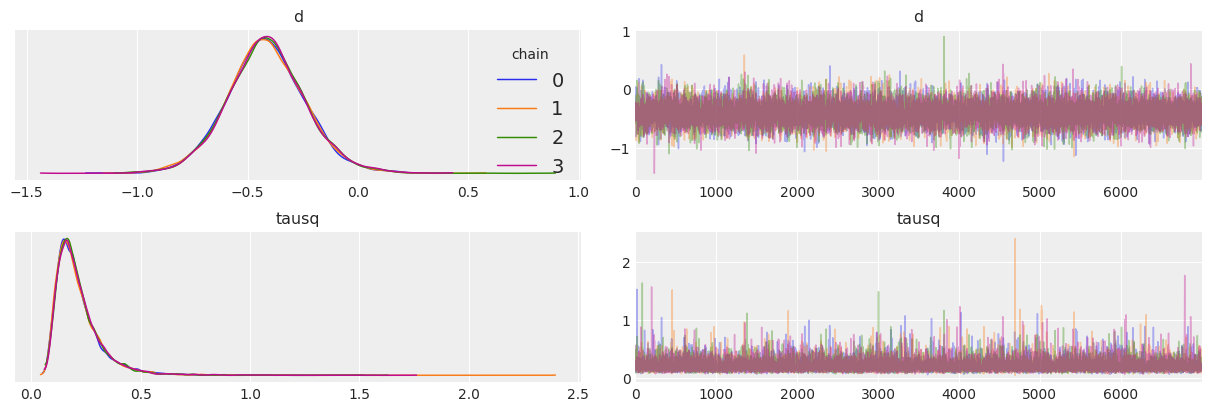

In [ ]:
az.plot_trace(rem_SS_SMD_fit,compact=False, legend=True,var_names=["d","tausq"])
plt.show()

In [ ]:
rem_SS_SMD_summ=az.summary(rem_SS_SMD_fit,var_names=["d","tausq"],round_to=3,hdi_prob=0.95)
rem_SS_SMD_summ

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
d,-0.415,0.179,-0.775,-0.064,0.001,0.001,23342.209,18239.913,1.0
tausq,0.214,0.110,0.070,0.416,0.001,0.001,24181.636,17044.268,1.0


In [ ]:
data_FB = az.from_pystan(posterior=rem_SS_SMD_fit)

data_FB.posterior['OverallSMD']=data_FB.posterior.d
data_FB.posterior['IndiSMD']=data_FB.posterior.mu

INFO:numba.core.transforms:finding looplift candidates


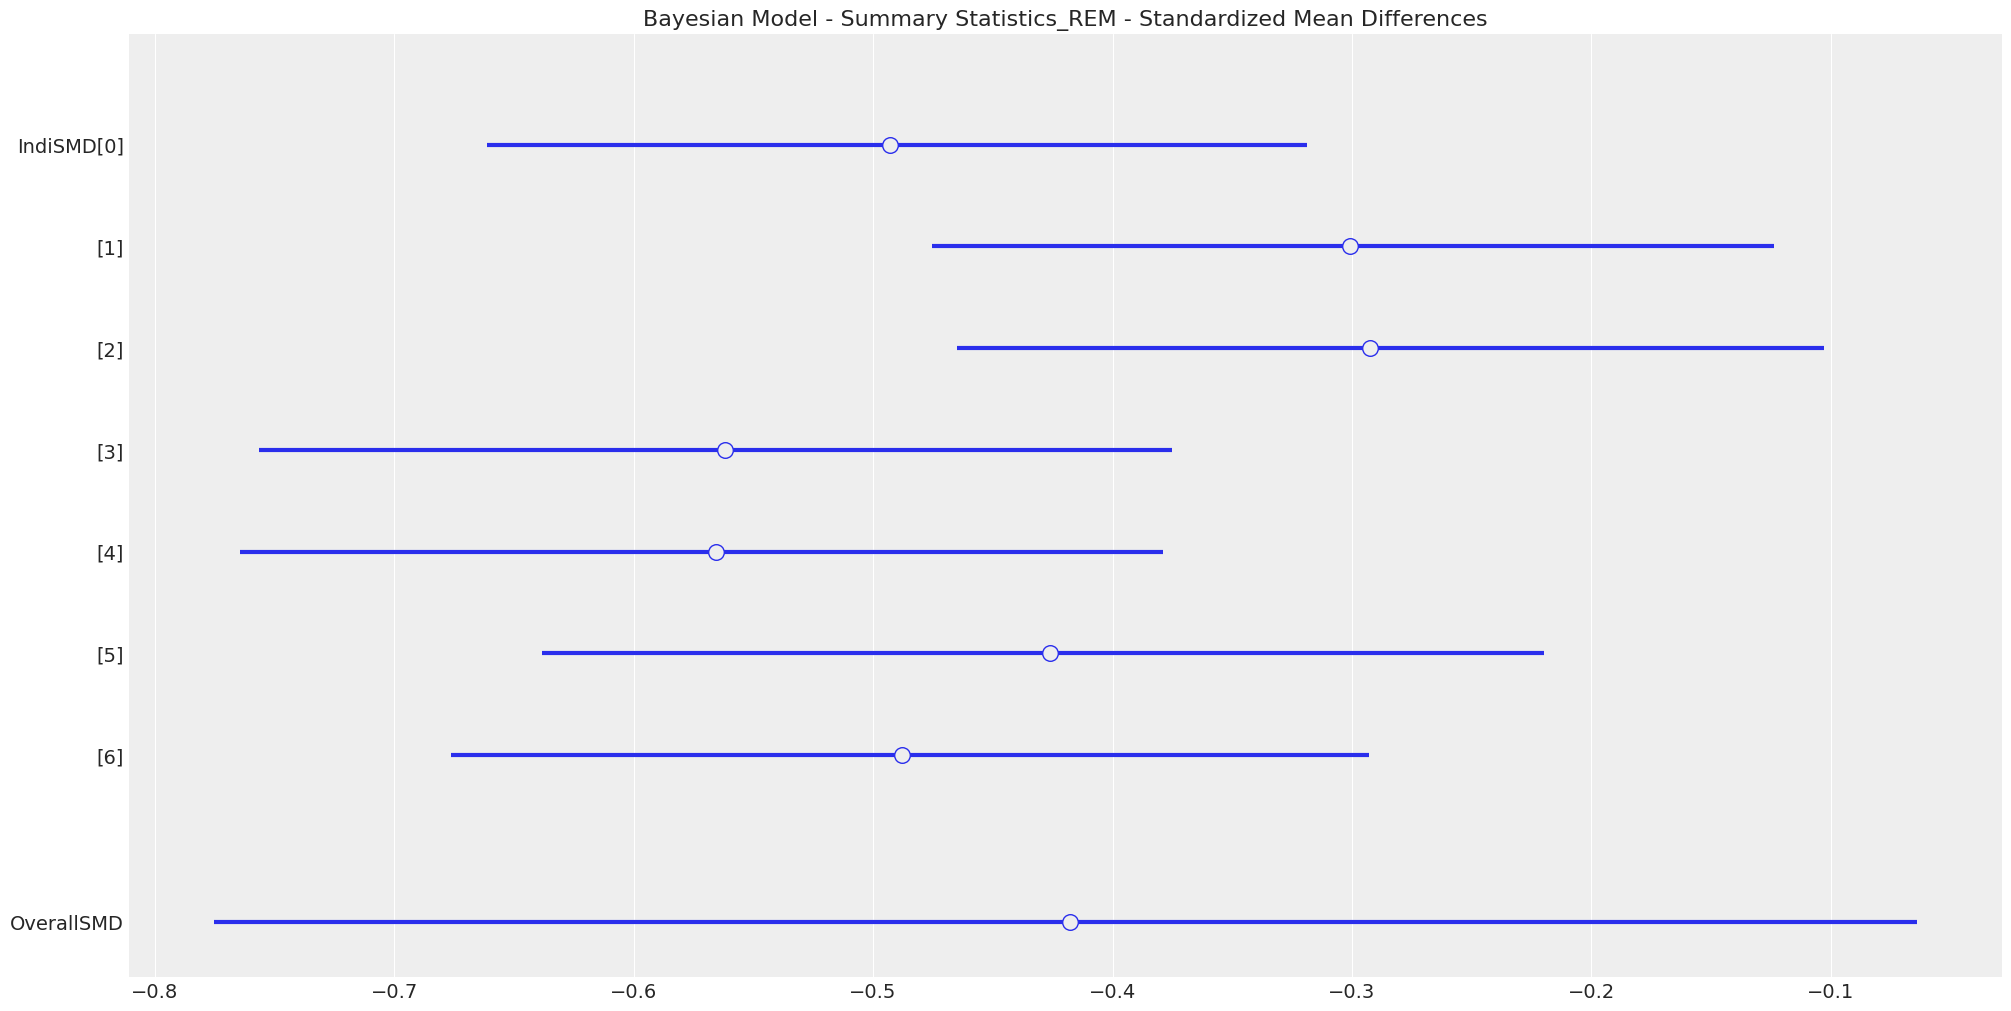

In [ ]:
import matplotlib.pyplot as pylt
az.style.use("arviz-darkgrid")
axes = az.plot_forest([data_FB], var_names=['IndiSMD', 'OverallSMD'],combined=True,
                      quartiles=False,hdi_prob=0.95,figsize=(20, 10),markersize=15)
axes[0].set_title("Bayesian Model - Summary Statistics_REM - Standardized Mean Differences")

plt.show()